In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
from poitousprint import Portic
portic_client = Portic()

In [122]:
#pointcalls = portic_client.get_pointcalls(year=1789, source_subset="Poitou_1789")

In [123]:
#len(pointcalls)

In [124]:
sorties = pd.read_csv("sorties_navires_vers_etranger.csv")

In [125]:
len(sorties)

367

In [126]:
sorties["homeport_state_1789_fr"] = sorties.homeport_state_1789_fr.str.replace("Duché de Mecklenbourg", "Mecklenbourg")

In [127]:
len(sorties[sorties.homeport_state_1789_fr.isna()])

28

In [128]:
sorties[sorties.homeport_state_1789_fr.isna()].sample(5)

,port_depart,outdate_fixed,port_destination,substate_destination,state_destination,homeport_state_1789_fr,homeport_toponyme_fr,homeport_province,commodity_standardized_fr,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr
273,Saint-Martin-de-Ré,1789-06-26,Biscaye,NaN,Espagne,NaN,pas identifié,NaN,Sel,NaN,NaN,NaN,1 800,0,0,45.0,tx,[21-50],NaN
87,Marennes,1789-08-22,Königsberg / Kaliningrad,NaN,Prusse,NaN,NaN,NaN,Sel,NaN,NaN,NaN,1 800,0,0,132.0,tx,[101-200],NaN
29,Ars-en-Ré,1789-02-09,Amsterdam,Hollande,Provinces-Unies,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,300.0,tx,[201-500],hollandais
4,Ars-en-Ré,1789-07-08,Rhode Island,Rhode Island,Etats-Unis d'Amérique,NaN,NaN,NaN,Sel,NaN,NaN,NaN,1 800,0,0,65.0,tx,[51-100],étasunien
197,Marennes,1789-04-17,Rotterdam,Hollande,Provinces-Unies,NaN,NaN,NaN,Sel,NaN,NaN,NaN,480,0,0,217.0,tx,[201-500],papenbourgeois


In [129]:
flag_to_homestate = {"britannique": "Grande-Bretagne",
                    "français": "France",
                     "danois": "Danemark",
                     "hollandais": "Provinces-Unies",
                     "étasunien": "Etats-Unis d'Amérique",
                     "prussien": "Prusse",
                     "lubeckois": "Lubeck",
                     "polonais": "Pologne",
                     "hambourgeois": "Hambourg",
                     "brémois": "Brême",
                     "meckelmbourgeois": "Mecklenbourg",
                     "oldenbourgeois": "Duché d'Oldenbourg",
                     "papenbourgeois": "Prusse"
                    }

In [130]:
sorties[sorties.homeport_state_1789_fr.isna()][["homeport_state_1789_fr", "ship_flag_standardized_fr"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr
180,NaN,britannique
63,NaN,britannique
3,NaN,NaN
127,NaN,danois
264,NaN,hollandais


In [131]:
sorties["flag"] = sorties.ship_flag_standardized_fr.map(flag_to_homestate)

In [132]:
sorties[["homeport_state_1789_fr", "ship_flag_standardized_fr", "flag"]].sample(5)

,homeport_state_1789_fr,ship_flag_standardized_fr,flag
109,Danemark,danois,Danemark
40,Danemark,danois,Danemark
97,Grande-Bretagne,britannique,Grande-Bretagne
68,Grande-Bretagne,britannique,Grande-Bretagne
140,Hambourg,hambourgeois,Hambourg


In [133]:
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna(sorties.flag)
sorties["homeport_state_1789_fr"] = sorties["homeport_state_1789_fr"].fillna("Non renseigné")

In [65]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
Danemark                  54
France                    54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Pologne                    7
Hambourg                   7
Brême                      5
Mecklenbourg               4
Espagne                    3
Duché d'Oldenbourg         2
Name: homeport_state_1789_fr, dtype: int64

In [66]:
sorties.state_destination.value_counts()

Grande-Bretagne          111
Danemark                  52
Provinces-Unies           41
zone maritime             29
Etats-Unis d'Amérique     26
Prusse                    20
Autriche                  16
Espagne                   14
France                    11
multi-Etat                11
Lubeck                     9
Hambourg                   7
Portugal                   6
Brême                      6
Pologne                    5
Russie                     2
Mecklenbourg               1
Name: state_destination, dtype: int64

In [155]:
sorties.substate_destination.value_counts()

Angleterre                          91
Norvège                             51
Hollande                            34
Massachussets                       16
Pays-Bas autrichiens                16
colonies françaises d'Amérique      10
Irlande                              7
Iles anglo-normandes                 6
Frise                                5
Ecosse                               4
Maryland                             4
colonies portugaises d'Afrique       2
Pennsylvanie                         2
Zélande                              2
îles atlantiques portugaises         2
Virginie                             2
colonies britanniques d'Amérique     2
Rhode Island                         1
New York                             1
Pays de Galles                       1
colonies françaises en Asie          1
Name: substate_destination, dtype: int64

In [19]:
sorties.homeport_state_1789_fr.value_counts()

Grande-Bretagne          123
Danemark                  54
France                    54
Provinces-Unies           44
Etats-Unis d'Amérique     25
Prusse                    23
Lubeck                     8
Non renseigné              8
Pologne                    7
Hambourg                   7
Brême                      5
Mecklenbourg               3
Espagne                    3
Duché d'Oldenbourg         2
Duché de Mecklenbourg      1
Name: homeport_state_1789_fr, dtype: int64

In [20]:
sorties.homeport_province.value_counts()

Aunis        31
Bretagne      9
Normandie     6
Guyenne       3
Saintonge     3
Poitou        1
Picardie      1
Name: homeport_province, dtype: int64

In [136]:
sorties["outside_DFLR"] = (
    (sorties["homeport_state_1789_fr"] != "France") | 
    (~sorties["homeport_province"].isin(["Aunis", "Poitou", "Saintonge"])))

In [137]:
sorties["Port d'attache"] = sorties["outside_DFLR"].map({True: "autres", False: "Aunis, Poitou, Saintonge"})

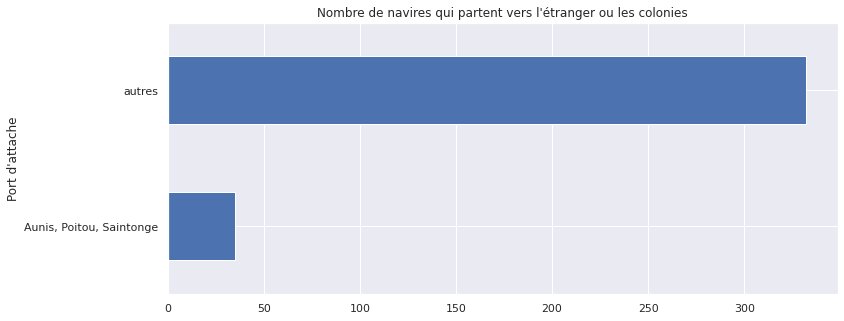

In [152]:
(sorties.groupby("Port d'attache").size()).plot.barh()
plt.title("Nombre de navires qui partent vers l'étranger ou les colonies")
plt.show()

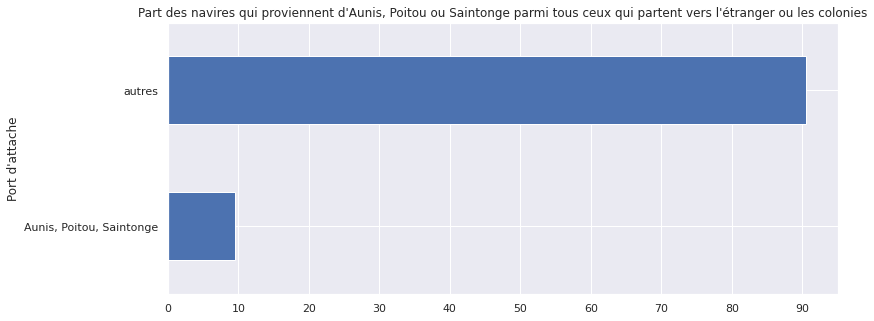

In [154]:
(sorties.groupby("Port d'attache").size()*100/len(sorties)).plot.barh()
plt.xticks(np.arange(0, 100, 10))
plt.title("Part des navires qui proviennent d'Aunis, Poitou ou Saintonge parmi tous ceux qui partent vers l'étranger ou les colonies")
plt.show()

In [102]:
sorties["commodity_standardized_fr"] = sorties["commodity_standardized_fr"].fillna("")

In [160]:
colonies = pd.read_csv("sorties_navires_vers_colonies.csv")

In [161]:
colonies

,record_id,ship_id,ship_name,captain_name,port_depart,outdate_fixed,port_destination,substate_destination,state_destination,homeport_state_1789_fr,...,commodity_standardized2_fr,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr
0,342065,0021420N,Bon Père,"Levasseur, Charle Philippe",La Rochelle,1789-04-06,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,NaN,1 800,0,0,584,tx,[501 et plus],français
1,340973,NaN,Huranien,"Hardouin, Etienne",La Rochelle,1789-02-13,Martinique,colonies françaises d'Amérique,France,France,...,NaN,NaN,NaN,1 800,0,0,400,tx,[201-500],français
2,341638,NaN,Méridien,"Lemic, Denis",La Rochelle,1789-06-27,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,NaN,1 800,0,0,92,tx,[51-100],français
3,336804,NaN,Espérance,"Bertrand, Jacques",Rochefort,1789-01-01,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,NaN,1 800,0,0,614,tx,[501 et plus],français
4,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île de France / île Maurice,colonies françaises en Asie,France,France,...,NaN,NaN,NaN,1 800,0,0,500,tx,[201-500],français
5,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île Bourbon / île de la Réunion,colonies françaises en Asie,France,France,...,NaN,NaN,NaN,1 800,0,0,500,tx,[201-500],français
6,341642,NaN,Deux Amis,"Villeneau, Pierre",La Rochelle,1789-11-20,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,NaN,14 400,0,0,402,tx,[201-500],français
7,341645,NaN,Angelique,"Pariés, Dominique",Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],colonies britanniques d'Amérique,Grande-Bretagne,France,...,NaN,NaN,NaN,1 800,0,0,210,tx,[201-500],français
8,341419,NaN,Jeune Armand,"Noel, Nicolas",La Rochelle,1789-07-11,Saint-Pierre-et-Miquelon,colonies françaises d'Amérique,France,France,...,NaN,NaN,NaN,1 800,0,0,210,tx,[201-500],français
9,341480,NaN,Duc de Saint Aignan,"La Brière, Sébastien Giot",La Rochelle,1789-07-06,Calabar,NaN,NaN,France,...,NaN,NaN,NaN,1 800,0,0,369,tx,[201-500],français


In [166]:
colonies["commodity_standardized_fr"] = colonies["commodity_standardized_fr"].fillna("")

In [167]:
colonies["vers_colonies"] = (
    colonies.substate_destination.str.startswith("colonie") & 
    (~colonies.commodity_standardized_fr.str.startswith("Pêche")) &
    (~colonies.port_destination.str.startswith("Saint-Pierre-et-Miquelon")) &
    (~colonies.port_destination.str.startswith("Terre-Neuve"))

)

In [168]:
colonies

,record_id,ship_id,ship_name,captain_name,port_depart,outdate_fixed,port_destination,substate_destination,state_destination,homeport_state_1789_fr,...,commodity_standardized3_fr,commodity_standardized4_fr,taxe_amount01,taxe_amount02,taxe_amount03,tonnage,tonnage_unit,tonnage_class,ship_flag_standardized_fr,vers_colonies
0,342065,0021420N,Bon Père,"Levasseur, Charle Philippe",La Rochelle,1789-04-06,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,1 800,0,0,584,tx,[501 et plus],français,True
1,340973,NaN,Huranien,"Hardouin, Etienne",La Rochelle,1789-02-13,Martinique,colonies françaises d'Amérique,France,France,...,NaN,NaN,1 800,0,0,400,tx,[201-500],français,True
2,341638,NaN,Méridien,"Lemic, Denis",La Rochelle,1789-06-27,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,1 800,0,0,92,tx,[51-100],français,False
3,336804,NaN,Espérance,"Bertrand, Jacques",Rochefort,1789-01-01,Côte d'Angole,colonies portugaises d'Afrique,Portugal,France,...,NaN,NaN,1 800,0,0,614,tx,[501 et plus],français,True
4,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île de France / île Maurice,colonies françaises en Asie,France,France,...,NaN,NaN,1 800,0,0,500,tx,[201-500],français,True
5,341461,NaN,Henri Quatre,"Gouin, Honoré Alexandre",La Rochelle,1789-05-09,île Bourbon / île de la Réunion,colonies françaises en Asie,France,France,...,NaN,NaN,1 800,0,0,500,tx,[201-500],français,True
6,341642,NaN,Deux Amis,"Villeneau, Pierre",La Rochelle,1789-11-20,Côte d'Or,NaN,multi-Etat,France,...,NaN,NaN,14 400,0,0,402,tx,[201-500],français,False
7,341645,NaN,Angelique,"Pariés, Dominique",Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],colonies britanniques d'Amérique,Grande-Bretagne,France,...,NaN,NaN,1 800,0,0,210,tx,[201-500],français,True
8,341419,NaN,Jeune Armand,"Noel, Nicolas",La Rochelle,1789-07-11,Saint-Pierre-et-Miquelon,colonies françaises d'Amérique,France,France,...,NaN,NaN,1 800,0,0,210,tx,[201-500],français,False
9,341480,NaN,Duc de Saint Aignan,"La Brière, Sébastien Giot",La Rochelle,1789-07-06,Calabar,NaN,NaN,France,...,NaN,NaN,1 800,0,0,369,tx,[201-500],français,False


In [ ]:
(colonies[.groupby("Port d'attache").size()).plot.barh()
plt.title("Nombre de navires qui partent vers l'étranger ou les colonies")
plt.show()

In [169]:
colonies[colonies.vers_colonies == True][["port_depart", "outdate_fixed", "port_destination", "homeport_province", "substate_destination", "commodity_standardized_fr", "tonnage", "tonnage_unit", "tonnage_class"]]

,port_depart,outdate_fixed,port_destination,homeport_province,substate_destination,commodity_standardized_fr,tonnage,tonnage_unit,tonnage_class
0,La Rochelle,1789-04-06,Côte d'Angole,Aunis,colonies portugaises d'Afrique,,584,tx,[501 et plus]
1,La Rochelle,1789-02-13,Martinique,Aunis,colonies françaises d'Amérique,,400,tx,[201-500]
3,Rochefort,1789-01-01,Côte d'Angole,Aunis,colonies portugaises d'Afrique,Marchandises permises,614,tx,[501 et plus]
4,La Rochelle,1789-05-09,île de France / île Maurice,Aunis,colonies françaises en Asie,,500,tx,[201-500]
5,La Rochelle,1789-05-09,île Bourbon / île de la Réunion,Aunis,colonies françaises en Asie,,500,tx,[201-500]
7,Ars-en-Ré,1789-08-06,colonies anglaises [en Amérique],Guyenne,colonies britanniques d'Amérique,,210,tx,[201-500]
17,La Rochelle,1789-12-02,Gonaïves,Aunis,colonies françaises d'Amérique,,240,tx,[201-500]
19,La Rochelle,1789-08-06,Cap-Français,Aunis,colonies françaises d'Amérique,,250,tx,[201-500]
26,Rochefort,1789-03-07,Cap-Français,Aunis,colonies françaises d'Amérique,Poudre à canon,160,tx,[101-200]
27,Ars-en-Ré,1789-04-21,Colonies françaises en Amérique,Bretagne,colonies françaises d'Amérique,Sel,70,tx,[51-100]


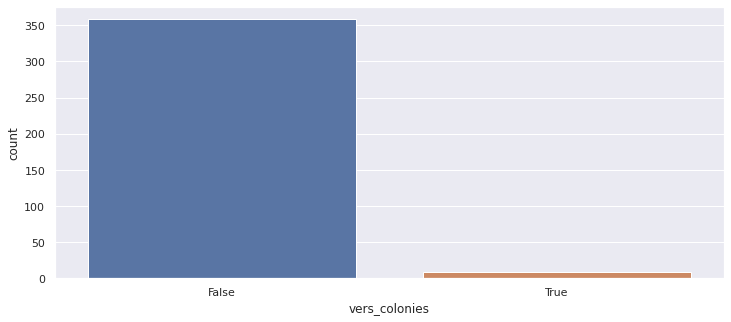

In [111]:
ax = sns.countplot(x="vers_colonies", data=sorties)

In [70]:
noDFLR = sorties[(sorties.outside_DFLR == True)]

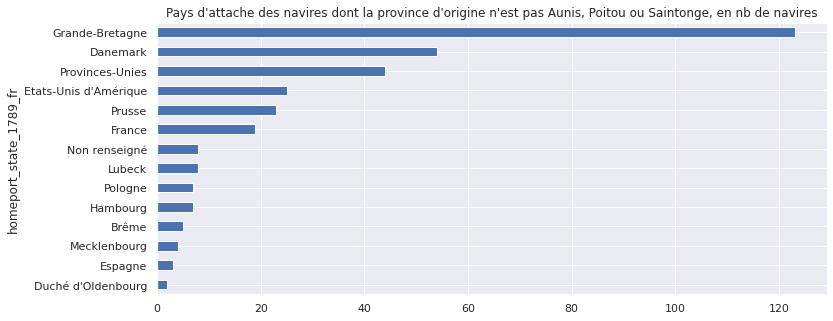

In [71]:
nb_pointcalls = noDFLR.groupby("homeport_state_1789_fr").size()
nb_pointcalls.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

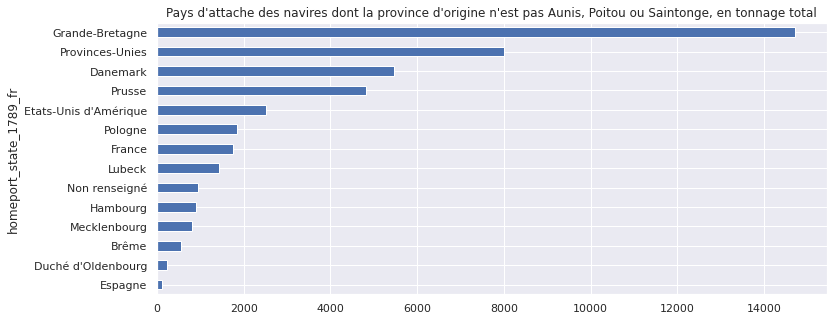

In [74]:
tonnage = noDFLR.groupby("homeport_state_1789_fr")["tonnage"].sum()
tonnage.sort_values().plot.barh()
plt.title(
    "Pays d'attache des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonnage total")
plt.show()

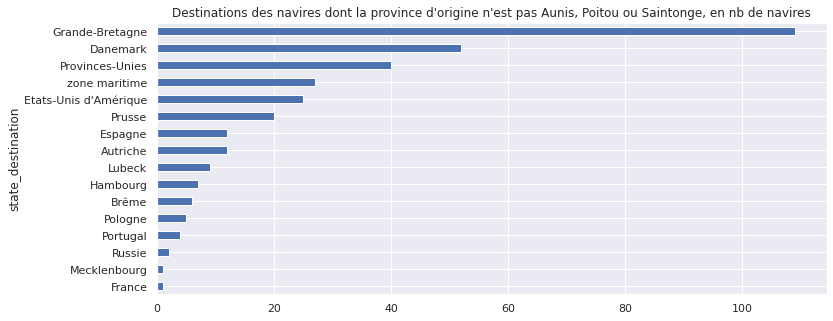

In [76]:
destination = noDFLR.groupby("state_destination").size()
destination.sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en nb de navires")
plt.show()

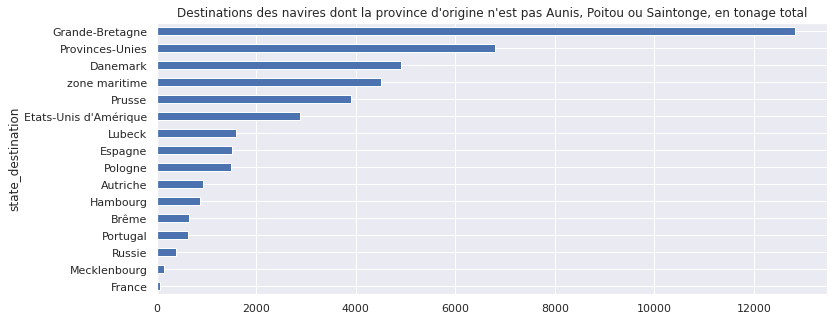

In [78]:
noDFLR.groupby("state_destination")["tonnage"].sum().sort_values().plot.barh()
plt.title(
    "Destinations des navires dont la province d'origine n'est pas Aunis, Poitou ou Saintonge, en tonage total")
plt.show()

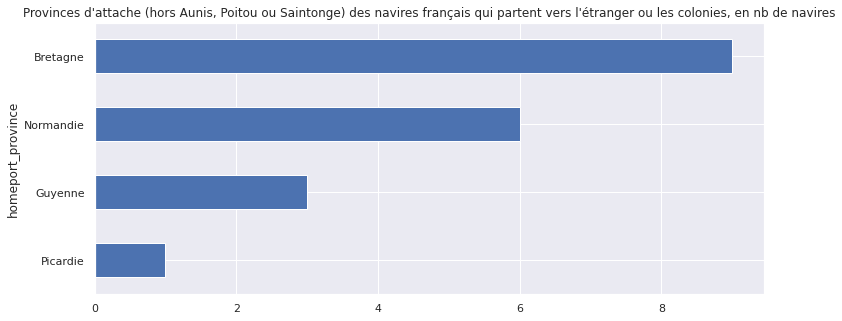

In [120]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province").size()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en nb de navires")
plt.show()

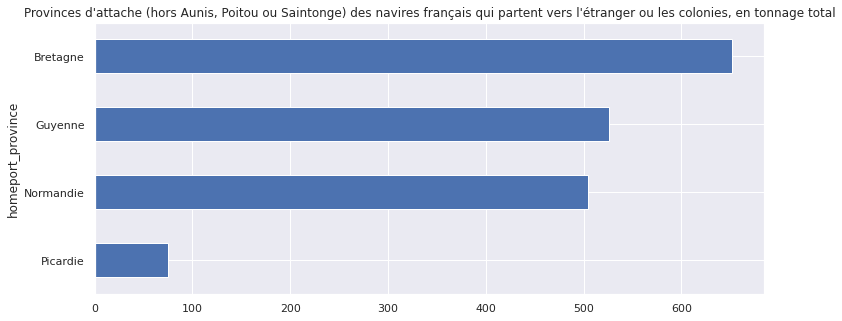

In [117]:
fr = noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].sum()
fr.sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage total")
plt.show()

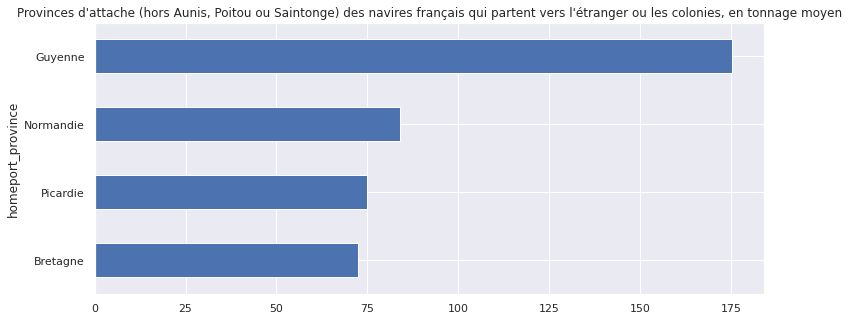

In [118]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("homeport_province")["tonnage"].mean().sort_values().plot.barh()
plt.title("Provinces d'attache (hors Aunis, Poitou ou Saintonge) des navires français qui partent vers l'étranger ou les colonies, en tonnage moyen")
plt.show()

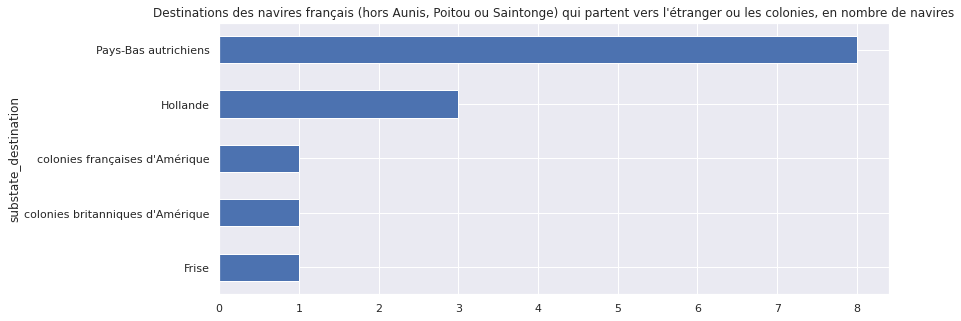

In [119]:
noDFLR[(noDFLR.homeport_state_1789_fr == "France")].groupby("substate_destination").size().sort_values().plot.barh()
plt.title("Destinations des navires français (hors Aunis, Poitou ou Saintonge) qui partent vers l'étranger ou les colonies, en nombre de navires")
plt.show()

<img src="mon_image.png">

In [ ]:
from IPython.core.display import SVG
SVG(filename=‘path_to_fichier.svg')